# Wavelet reconstruction

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import sigpy.mri
import sigpy.plot
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

from utils import *

sitk_t1=sitk.ReadImage('../files/t1.nii.gz')
t1=sitk.GetArrayFromImage(sitk_t1)
original = t1[45]
ksp = sigpy.fft(original)

acc_factors = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
N_spokes = (256/acc_factors).astype(int)

SNRs = []
SSIMs = []

/home/oscar/Programs/miniconda3/envs/imrcenv/lib/python3.10/site-packages/sigpy/config.py:27: UserWarning: Importing cupy.cuda.cudnn failed. For more details, see the error stack below:
No module named 'cupyx.cudnn'
  warnings.warn(


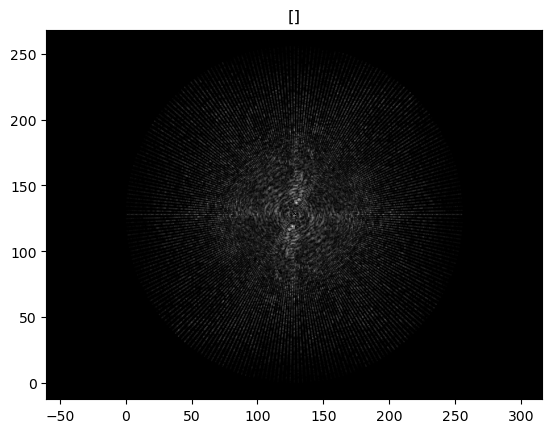

In [2]:
sampled_ksp, coord = radial_sampling(ksp, N_spokes[0], n_samples=256, dcomp=True)
gridded_ksp = sigpy.gridding(sampled_ksp, coord, (256,256))
sigpy.plot.ScatterPlot(coord, sampled_ksp,)
# sigpy.plot.ImagePlot(gridded_ksp,mode='l', title='Log magniude of gridded k-space')

In [3]:
# Convert gridded_ksp to the form (n_coils,...) required by EspiritCalib
gridded_ksp = gridded_ksp[np.newaxis,...]
gridded_ksp.shape

(1, 256, 256)

EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

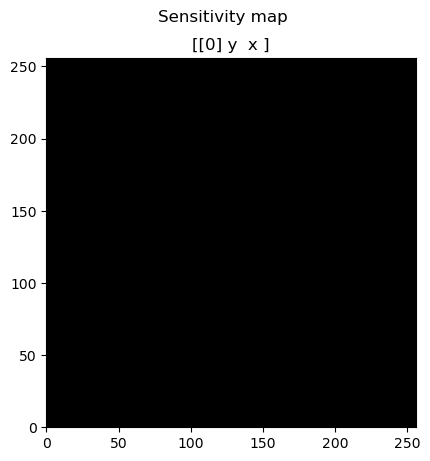

(1, 256, 256)

In [4]:
#Estimate coil sensitivity
mps = sigpy.mri.app.EspiritCalib(gridded_ksp).run()
sigpy.plot.ImagePlot(mps, title='Sensitivity map',mode='l')
mps.shape

SenseRecon:   0%|          | 0/100 [00:00<?, ?it/s]

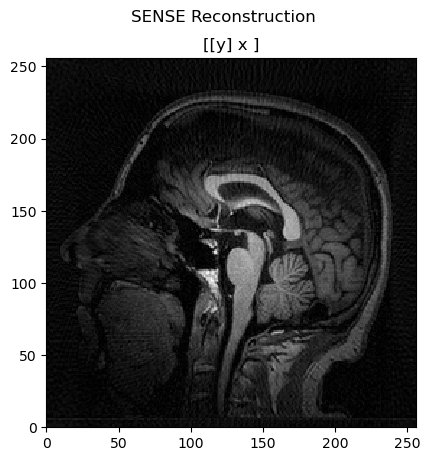

In [5]:
lamda = 0.5
img_sense = sigpy.mri.app.SenseRecon(gridded_ksp, mps, lamda=lamda).run()
sigpy.plot.ImagePlot(np.flip(img_sense,axis=(0,)), title='SENSE Reconstruction')

# L1 Wavelet reconstruction

MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

L1WaveletRecon:   0%|          | 0/100 [00:00<?, ?it/s]

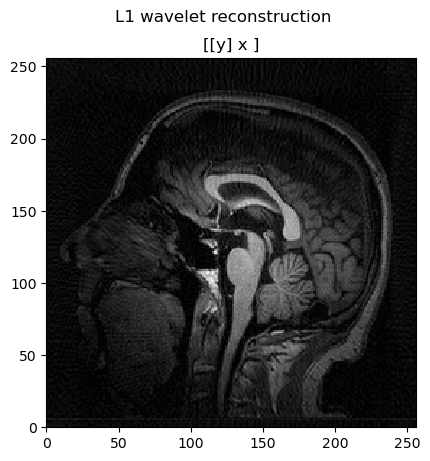

(256, 256)


In [7]:
lamda = 0.001
img_l1wav = sigpy.mri.app.L1WaveletRecon(gridded_ksp, mps, lamda).run()
sigpy.plot.ImagePlot(np.flip(img_l1wav,axis=(0,)), title='L1 wavelet reconstruction')
print(img_l1wav.shape)